In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


In [71]:
# Importing Necessary libraries
import re
import nltk
import spacy

In [72]:
# Loading Data
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [73]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [74]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Here we will remove keyword and location variables. They donot have much of a value here. In addition to that, there are many NaN values. So it is better to remove those variables. 

In [75]:
train=train.drop(columns=['keyword', 'location'])

In [76]:
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


Now we have everything required for us to get started. Here id is the reference like an index. 'text' is our asset. We will be working on that. 'target' is the target variable. 

In [77]:
import string

In [78]:
train['text'] = train['text'].str.lower()

In [79]:
train.head()

,id,text,target
0,1,our deeds are the reason of this #earthquake m...,1
1,4,forest fire near la ronge sask. canada,1
2,5,all residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,just got sent this photo from ruby #alaska as ...,1


In the earlier preview, you can find a mixture of upper and lower case letters. Now, you can see that whole of the text is in lower case. This forms the first step of text preprocessing. Let us now split our dataset for the target and text variables. 

In [80]:
target=train['target']

In [81]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [82]:
text=train['text']

In [83]:
text.head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

The above data has punctuation with it and they do not have any semantic meaning in our data. So we will remoce it. The following is a better way of removing it. 

In [84]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

text_clean = text.apply(lambda text: remove_punctuation(text))

In [85]:
text_clean.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

You can find that the functuations are removed. Now we will remove the so called stopwords. They are highly repetitive words in the text but do not posses a greater value for their presence. So we will remove it. 

In [86]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [87]:
def stopwords_(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

text_clean = text_clean.apply(lambda text: stopwords_(text))

In [88]:
text_clean.head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

You can find ityourself right. The use of removing these words. Want to know what are those words. Take a look at it. 

In [89]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Yeah. you have now completed the first phase of the text preprocessing. Now let us proceed to the next one. 

Lemmatization is the process of reducing the words to their roots. Let us take a look at an example for better understanding. 

In [90]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatizer_(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [91]:
lemmatizer.lemmatize("wrote", "v")

'write'

In [92]:
lemmatizer.lemmatize("written", "v")

'write'

Do I need to explain further. Hahaha. Not at all necesary. It is self explanatory. But if you have any doubts donot hesitate to comment in the comment section. 

Let us apply this to our text. 

In [93]:
text_clean = text_clean.apply(lambda text: lemmatizer_(text))

In [94]:
text_clean.head()

0           deed reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
3    13000 people receive wildfire evacuation order...
4    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

All of these can also be done by in-built packages. But it is a good parctice in the beginning to understand our data better. 

Now for the fun part, we will look at the most used words in the cleaned text. We will use wordcloud library for that. 

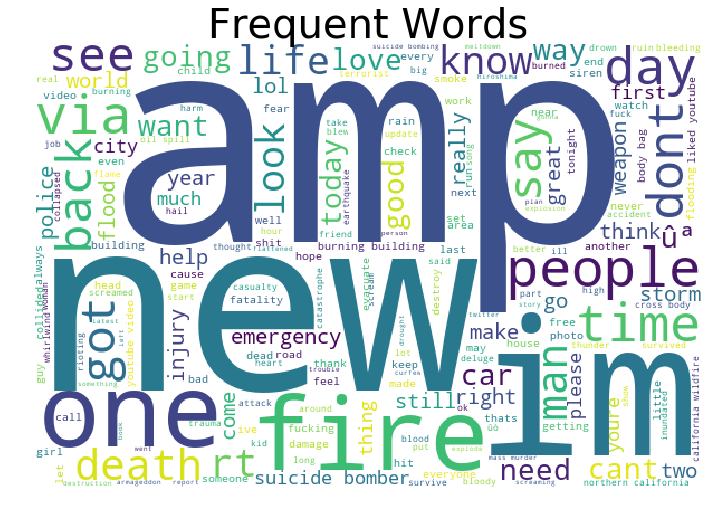

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[12, 12])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(text_clean))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=40);

If you find anything unnecessary or to be removed, you can do so by appending it to the stopwords or remove it manually.

Sometime later, I will share a kernel on how to solve this problem in an efficient manner. 

Hope you find this useful. If you like this kernel, please consider upvoting it. 